## pid example
we know approx. velocity of the robot. We can not change the velocity, but we can control how long robot will drive.
We have to control time that robot is driving to get him to the destination.
### variables
- $t_l$ = time left to complete the route
- $dt$ = time step
- $v$ = velocity
- $x_c$ =current position
- $x_e$ = destination
### equation for time left to get to destination.
$$s = |x_e - x_c| $$ 
$$ t_l = \frac{s}{v} $$
$$t_l = \frac{x_e - x_c}{v}$$


## first order low pass filter
$$ H(s) = \frac{1}{1 + \frac{s}{w_c}} $$
$w_c$ = cutoff frequency
s = signal 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from lowpass import first_order_lowpass, transform_angle
from scipy import signal

In [10]:
N = 400
wc = .9
rng = np.random.default_rng()
t = np.linspace(-1, 1, N)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + rng.standard_normal(len(t)) * 0.08


In [11]:
b, a = signal.butter(3, 0.05)

In [12]:

zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

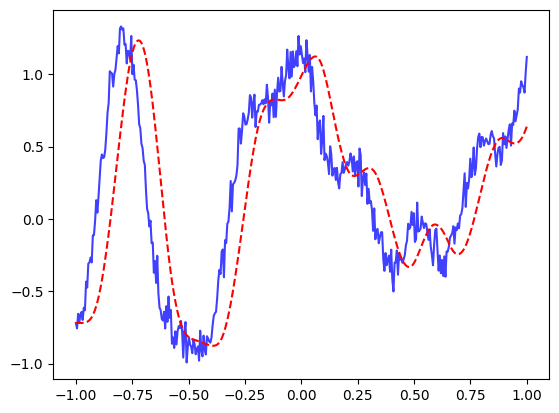

In [13]:
plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--')